# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Carlos Gilberto Montes Peña

- ID: A01643868

- My carreer: ITC


# Importing libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [9]:
RunInColab = True
if RunInColab:
    from google.colab import drive
    drive.mount('/content/drive')
    ruta = "/content/drive/My Drive/SemanaTEC - Analitica"
else:
    ruta = ""

file_path = '/content/drive/MyDrive/SemanaTEC - Analitica/A01643868_X.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## b) Data managment


Print the first 7 rows

In [10]:
df.head(7)

Unnamed: 0        x1        x2         x3         x4        x5         x6  \
0           0 -5.297096 -3.588633  -2.311242 -11.723420  3.117758  11.251682   
1           1 -2.964854 -7.100155  -7.716630  -1.613592  8.116463  -8.852733   
2           2  4.648483 -2.966849   1.859833  -6.883282 -9.115391  -8.227471   
3           3 -3.157815 -6.534690  10.068082   6.621917  2.053045  -0.746104   
4           4 -8.788829 -6.761945  -2.268275 -12.269663  4.817210   9.978635   
5           5 -1.230021  1.321030   1.467221   7.083912 -6.201783  -0.530608   
6           6 -3.575612  3.037612   2.340684   5.501690 -1.961709  -0.625533   

          x7        x8         x9  ...      x162      x163      x164  \
0   0.671957  8.585658  -7.279379  ... -2.429643 -5.424299 -8.028194   
1 -10.872005 -1.249878  -3.305873  ... -4.005792 -4.844508  0.417461   
2  -7.183269 -9.957243   0.108525  ...  6.088651  6.139637 -0.537448   
3  -6.427612 -2.842645   9.142847  ... -1.482214  4.047644 -4.245033   
4   5.028180  5.483450 -11.437682  ... -3.908868 -4.669087 -8.851562   
5   5.225868 -3.266273 -10.412181  ... -1.217715 -4.555939 -5.566309   
6   4.185489 -5.741420   7.086147  ... -2.733791 -0.435726  2.191692   

        x165      x166       x167      x168      x169       x170      x171  
0   6.375578 -0.085440  11.829949 -0.496141  0.185813   9.302035  6.470615  
1   7.400758  4.154611   6.594929  9.424848  6.490702  -3.512871 -1.082877  
2   7.183869  5.526045   8.321219 -2.400705 -3.423715   1.605814 -7.627075  
3   9.116842  0.606748   2.806789 -1.996958  0.837771  -0.042954  6.363484  
4   3.089562 -3.281933   7.571947 -1.219860 -3.327127   5.895212  5.982571  
5  13.293977 -4.843210  -5.457762  7.171480  8.076801  10.220985  6.718843  
6   1.090429  9.771528   7.475754  9.276175 -5.662973  -4.544377  6.198868  

[7 rows x 172 columns]

Print the last 4 rows

In [11]:
df.tail(4)

Unnamed: 0        x1         x2        x3        x4        x5  \
26717       26717  3.513155  10.484382  3.724708  6.387680 -9.817655   
26718       26718 -7.570067  -1.518034  3.023575 -7.561518 -3.221580   
26719       26719  5.616108   4.944311  4.553685 -5.604047 -8.977133   
26720       26720 -8.049497  -7.028368  9.939929 -8.990161 -7.700562   

             x6        x7        x8        x9  ...      x162      x163  \
26717 -4.718946  5.030592 -4.145223  4.951513  ...  9.988876 -3.107732   
26718 -4.771321 -9.195180  1.152325  6.341444  ... -7.465134  0.437516   
26719  2.801763 -9.146706  3.535423 -3.587130  ... -9.547144 -1.179651   
26720  2.373554  2.081306  0.649924  7.165571  ... -7.316904 -4.052224   

           x164       x165      x166      x167      x168       x169  \
26717 -2.450581 -11.555653  4.071947  4.535958 -1.611987   5.192367   
26718 -3.043163  -4.777813 -0.931975  1.735749  2.009697 -10.302336   
26719  4.520636   6.095711  3.224542  7.575412 -7.235085  -7.125984   
26720 -2.592697   9.597325 -1.938833  8.441806  1.836909  -5.838193   

            x170      x171  
26717  -2.852284  4.965780  
26718  -7.779296 -1.792976  
26719  12.091523  6.489197  
26720   2.663586 -9.861161  

[4 rows x 172 columns]

How many rows and columns are in your data?

Use the `shape` method


In [12]:
df.shape

(26721, 172)

Print the name of all columns

Use the `columns` method

In [13]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x162', 'x163', 'x164', 'x165', 'x166', 'x167', 'x168', 'x169', 'x170',
       'x171'],
      dtype='object', length=172)

What is the data type in each column

Use the `dtypes` method

In [14]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
               ...   
x167          float64
x168          float64
x169          float64
x170          float64
x171          float64
Length: 172, dtype: object

What is the meaning of rows and columns?

Your responses here

1. First column is the ID of the data

2. All other columns are variables of the ID number

3. Rows are the different observations of the data with their unique values for the variables

Print a statistical summary of your columns


In [15]:
df.describe()

Unnamed: 0            x1            x2            x3            x4  \
count  26721.000000  26721.000000  26721.000000  26721.000000  26721.000000   
mean   13360.000000      0.316052     -0.877649     -0.223739     -0.232131   
std     7713.832608      5.148807      5.995156      6.219048      6.587553   
min        0.000000    -15.698537    -15.283178    -16.604119    -17.405142   
25%     6680.000000     -3.417244     -5.869283     -5.788701     -5.910806   
50%    13360.000000     -0.077152     -1.063916      0.276762      0.317120   
75%    20040.000000      4.392065      4.129283      4.907767      5.312431   
max    26720.000000     15.823661     14.765370     15.376154     17.410705   

                 x5            x6            x7            x8            x9  \
count  26721.000000  26721.000000  26721.000000  26721.000000  26721.000000   
mean      -1.307076     -0.780864     -0.773608      0.370313      0.976745   
std        5.890968      5.666428      6.514649      6.160110      6.993819   
min      -15.482634    -15.835518    -16.076976    -17.256555    -16.509541   
25%       -5.923773     -5.385826     -7.124879     -3.985766     -5.385457   
50%       -2.018526     -0.566723      0.361112     -0.373823      1.887131   
75%        2.299805      3.547072      4.797607      5.512397      7.033782   
max       16.617299     15.929212     15.526119     17.365430     16.829187   

       ...          x162          x163          x164          x165  \
count  ...  26721.000000  26721.000000  26721.000000  26721.000000   
mean   ...     -0.771905      0.515674     -0.264040      1.280843   
std    ...      5.713231      5.858791      5.984188      5.854023   
min    ...    -15.674022    -15.331108    -15.870343    -15.882274   
25%    ...     -4.541103     -4.237232     -5.287808     -2.944936   
50%    ...     -1.674341      0.031037     -0.498179      1.785567   
75%    ...      2.629399      5.354153      4.602107      5.963902   
max    ...     15.431526     16.905181     15.949033     16.627928   

               x166          x167          x168          x169          x170  \
count  26721.000000  26721.000000  26721.000000  26721.000000  26721.000000   
mean       0.616056      1.551186      1.236020     -0.951994      0.577954   
std        6.086502      6.399687      6.183292      6.687816      5.999799   
min      -17.044971    -15.841492    -15.861874    -17.336186    -17.703646   
25%       -4.414840     -4.435593     -3.567521     -6.801956     -3.905252   
50%        0.449854      2.656144      1.471769     -1.355249      0.129500   
75%        5.800881      6.999033      6.544550      4.424384      5.357804   
max       16.053596     16.132553     16.582280     16.544720     16.254861   

               x171  
count  26721.000000  
mean       2.078415  
std        5.638653  
min      -16.446370  
25%       -2.643157  
50%        2.990184  
75%        6.680013  
max       16.127590  

[8 rows x 172 columns]

1. What is the minumum and maximum values of each variable:

x1 - min: -15.698537, max: 15.823661

x2 - min: -15.283178, max: 14.765370

x3 - min: -16.604119, max: 15.376154

x4 - min: -17.405142, max: 17.410705

x5 - min: -15.482634, max: 16.617299

x6 - min: -15.835518, max: 15.929212

x7 - min: -16.076976, max: 15.526119

x8 - min: -17.256555, max: 17.365430

x9 - min: -16.509541, max: 16.829187

...

2. What is the mean and standar deviation of each variable:

x1 - mean: 0.316052, std: 5.148807

x2 - mean: -0.877649, std: 5.995156

x3 - mean: -0.223739, std: 6.219048

x4 - mean: -0.232131, std: 6.587553

x5 - mean: -1.307076, std: 5.890968

x6 - mean: -0.780864, std: 5.666428

x7 - mean: -0.773608, std: 6.514649

x8 - mean: 0.370313, std: 6.160110

x9 - mean: 0.976745, std: 6.993819

...

3. What the 25%, 50% and 75% represent?:
They represent that for each the 25%, 50% or 75% of the each variable the values are less than the value in that category

Rename the columns using the same name with capital letters

In [16]:
df.columns = df.columns.str.upper()
df.columns

Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X162', 'X163', 'X164', 'X165', 'X166', 'X167', 'X168', 'X169', 'X170',
       'X171'],
      dtype='object', length=172)

Rename the columns to their original names

In [17]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x162', 'x163', 'x164', 'x165', 'x166', 'x167', 'x168', 'x169', 'x170',
       'x171'],
      dtype='object', length=172)

Use two different alternatives to get one of the columns

In [18]:
df['x1']
df.x1

0       -5.297096
1       -2.964854
2        4.648483
3       -3.157815
4       -8.788829
           ...   
26716    1.197682
26717    3.513155
26718   -7.570067
26719    5.616108
26720   -8.049497
Name: x1, Length: 26721, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [19]:
df.iloc[62:73, 1:3]

x1        x2
62  -2.627687  2.441144
63 -10.191609 -5.029216
64  -2.740537  1.541970
65  -2.993429 -4.544154
66   5.252066 -6.804159
67  -4.765435 -1.013246
68  -1.698798 -0.227196
69  -4.608439 -0.838666
70   2.400736 -0.542049
71   9.396578 -3.955133
72   3.078350 -5.958070

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [20]:
x2_null = df['x2'].isnull().sum()
x2_not_null = df['x2'].notnull().sum()
x2_total = df['x2'].count()
print(f"Null values in x2: ", x2_null)
print(f"Not null values in x2: ", x2_not_null)
print(f"Total values in x2: ", x2_total)

x3_null = df['x3'].isnull().sum()
x3_not_null = df['x3'].notnull().sum()
x3_total = df['x3'].count()
print(f"Null values in x3: ", x3_null)
print(f"Not null values in x3: ", x3_not_null)
print(f"Total values in x3: ", x3_total)

Null values in x2:  0
Not null values in x2:  26721
Total values in x2:  26721
Null values in x3:  0
Not null values in x3:  26721
Total values in x3:  26721


Discard the last column


In [21]:
df = df.iloc[:, :-1]

### Questions

Based on the previos results, provide a full description of yout dataset

Your response:
I have a dataset with 26721 rows and 172 columns. All the data is numerical. There is no null values in the dataset. The first column seems to be the number of row or ID and all other 171 columns named x1, x2, ... x71 seem to be variables corresponding to the observation number but no other aditional data on the meaning of this variable was provided.




## c) Data visualization

Plot in the histogram of one of the variables

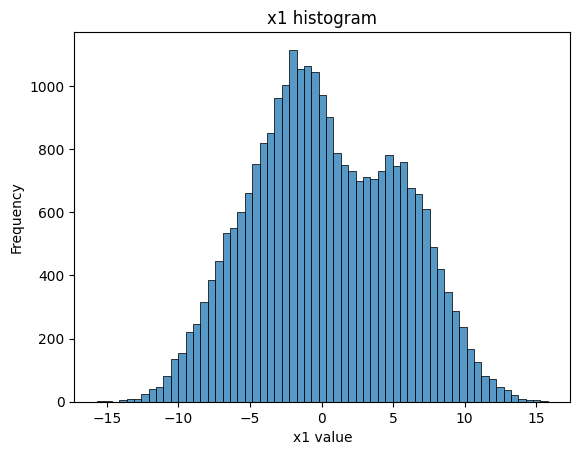

In [22]:
sns.histplot(df['x1'])
plt.xlabel('x1 value')
plt.ylabel('Frequency')
plt.title('x1 histogram')
plt.show()

Plot in the same figure the histogram of two variables



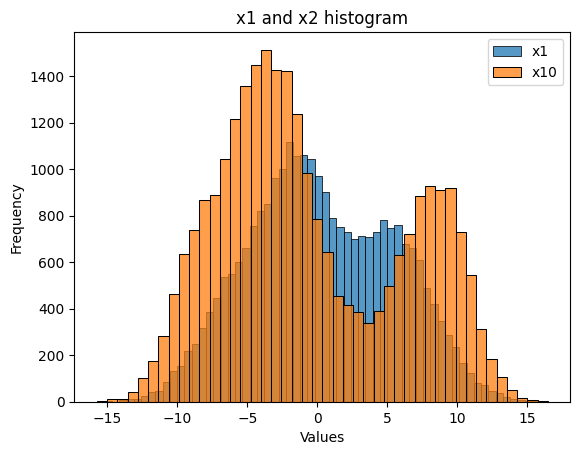

In [23]:
sns.histplot(df['x1'], label='x1')
sns.histplot(df['x10'], label='x10')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('x1 and x2 histogram')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:
Based on the histogram it looks like the values in the x1 and x10 follow the same pattern but x10 having bigger values

Plot the boxplot of one of the variables

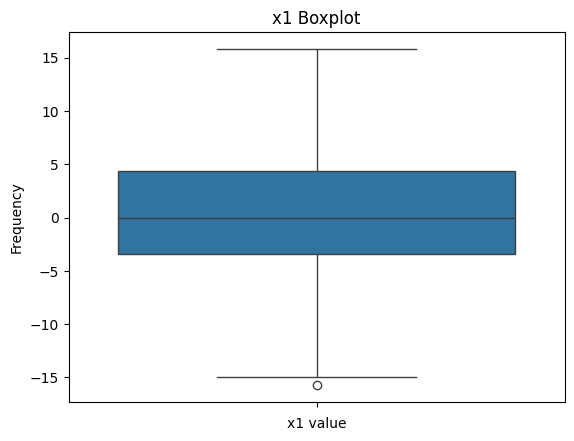

In [24]:
sns.boxplot(df['x1'])
plt.xlabel('x1 value')
plt.ylabel('Frequency')
plt.title('x1 Boxplot')
plt.show()

Plot in the same figure the boxplot of two variables

Text(0.5, 1.0, 'x1 and x10 boxplot')

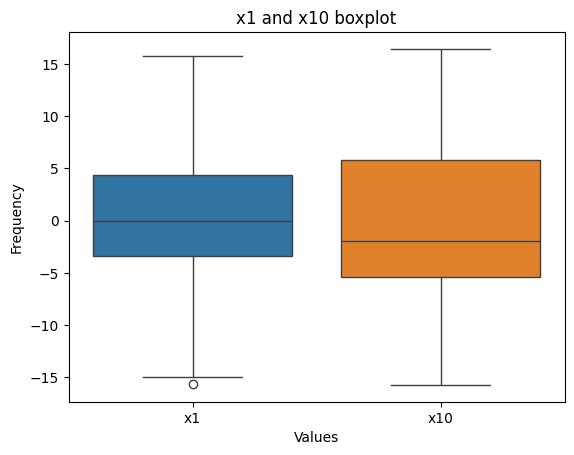

In [25]:
sns.boxplot(data=df[['x1','x10']])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('x1 and x10 boxplot')

Based on these plots, provide a description of your data:

Your response here:
Looks like they are showing similar variability and range, with both spanning approximately from -15 to 15. The medians are close to 0, but x10 is slightly negative,

Plot the scatter plot between all pair of variables

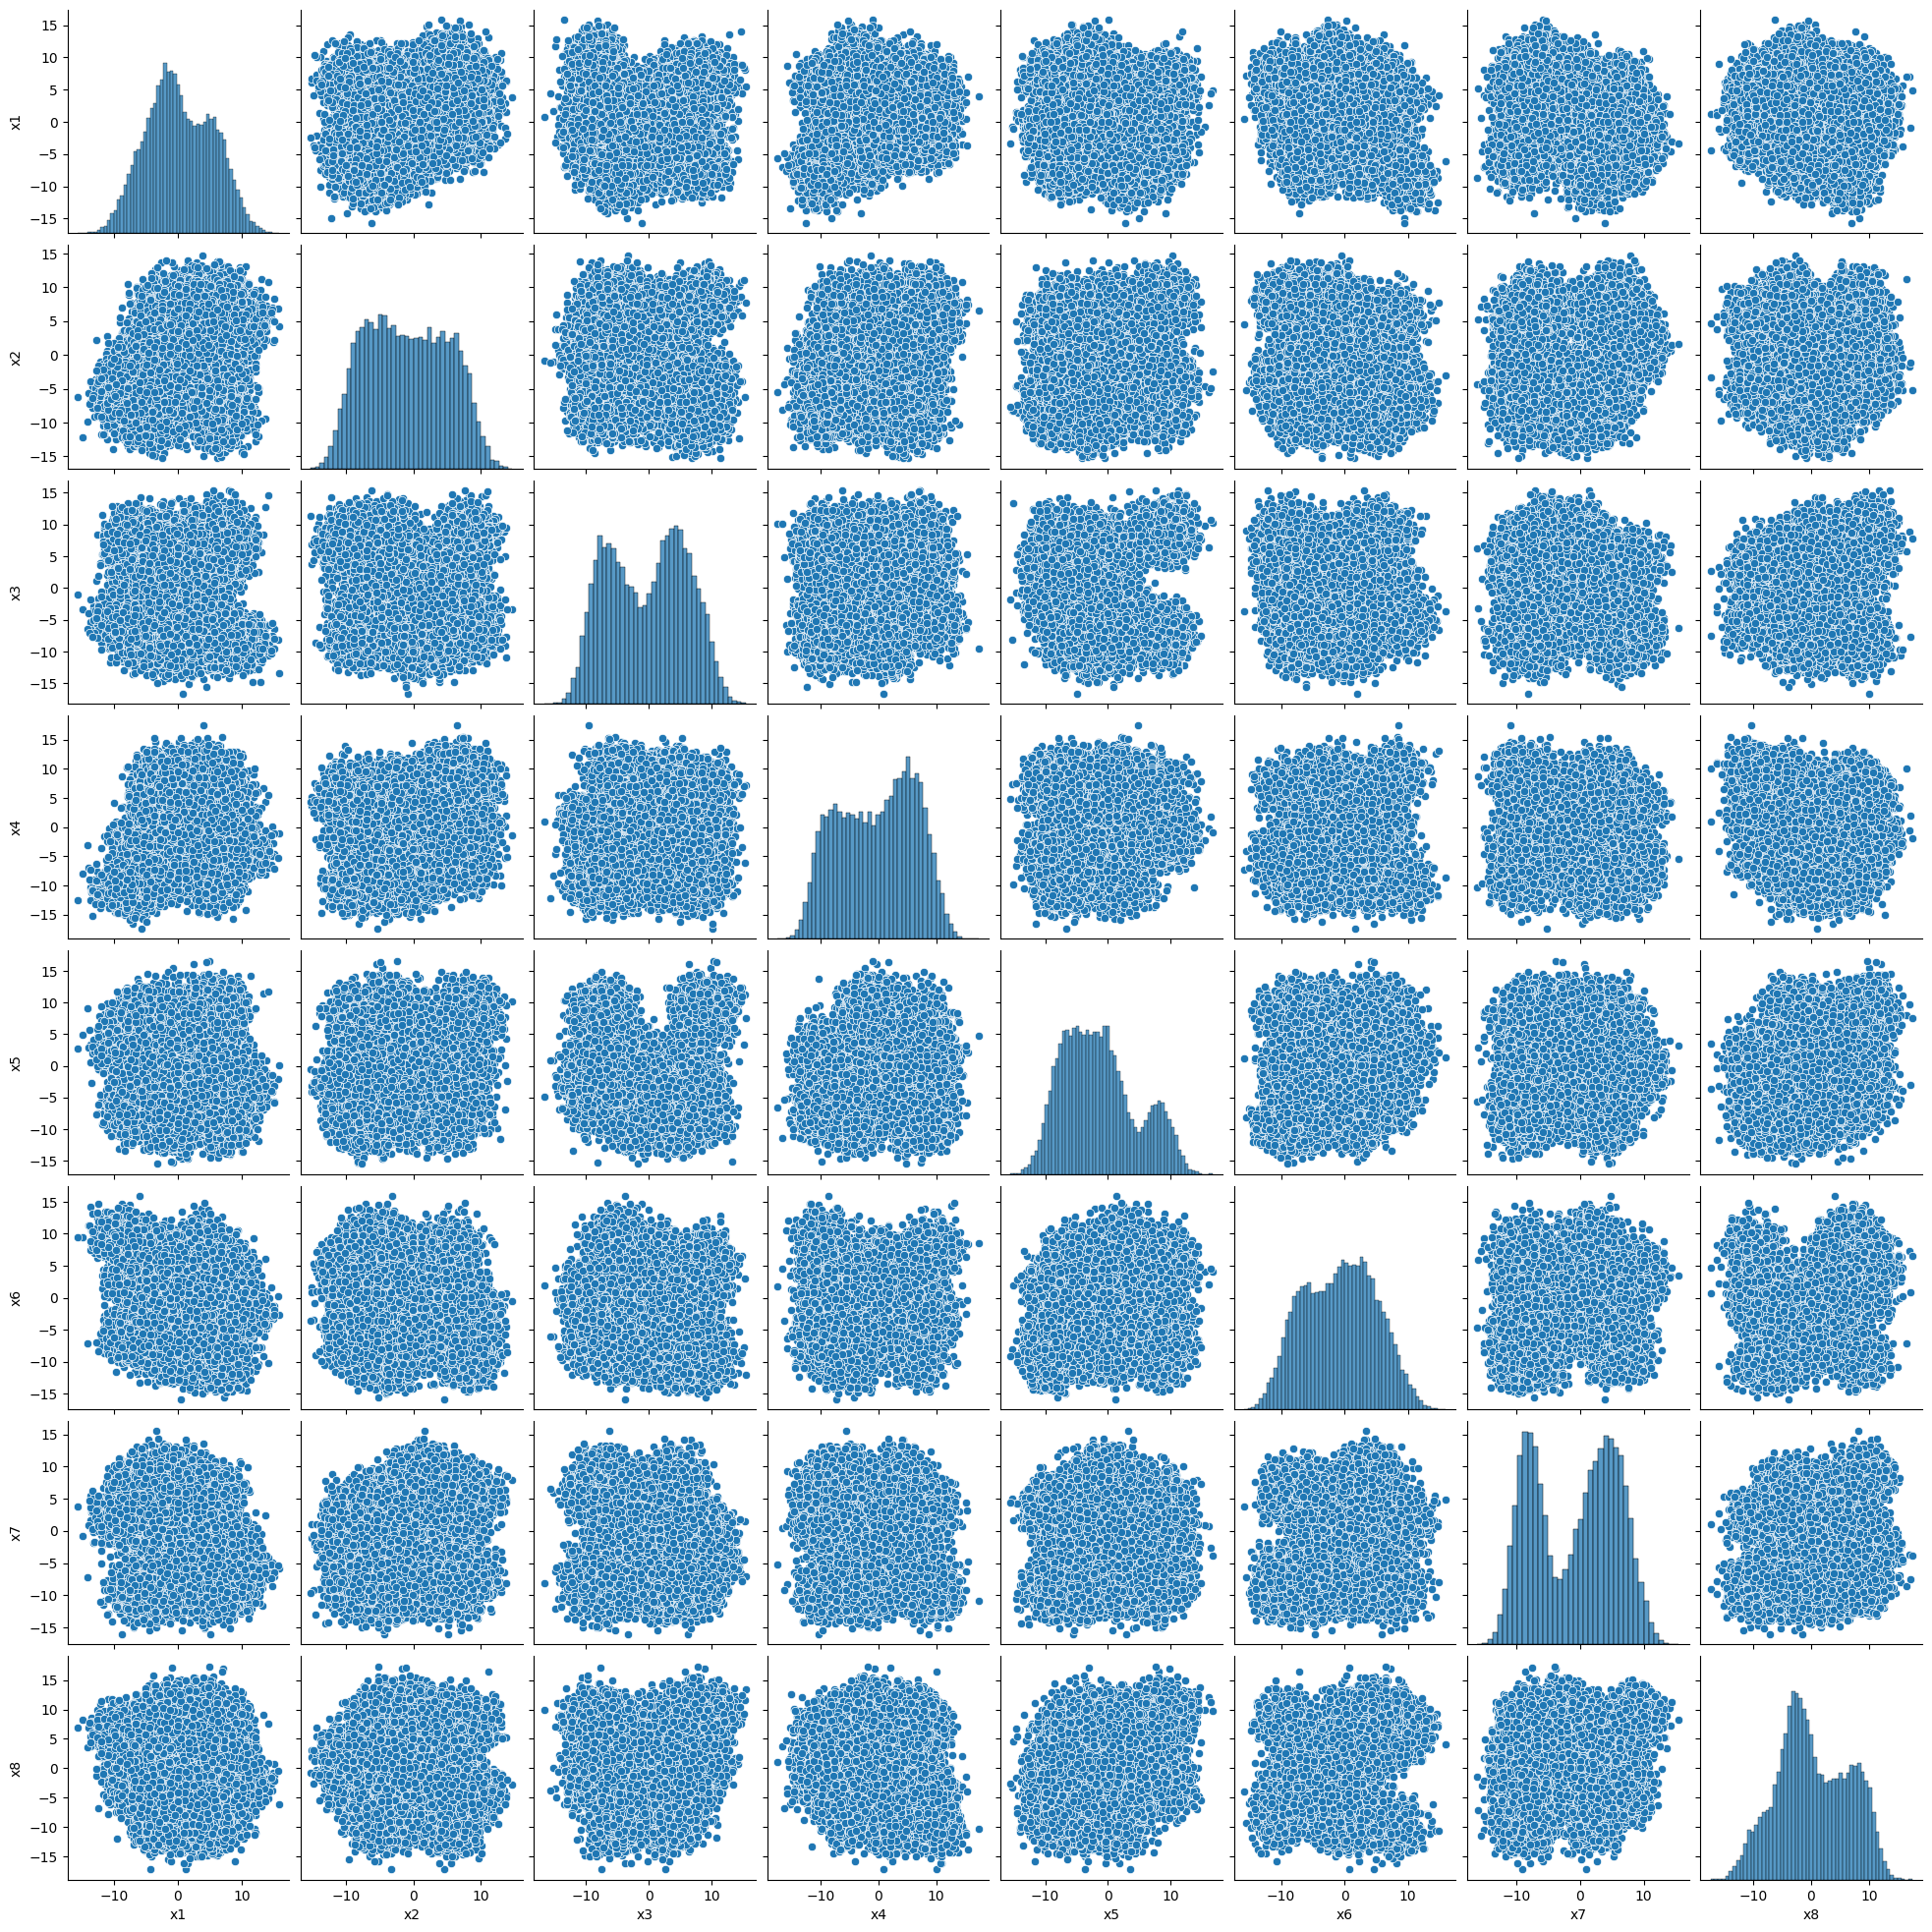

In [26]:
#Only plotting the first 8 variables because 171 took a lot of runtime
sns.pairplot(df.iloc[:, 1:9])
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df.iloc[:, 1:])

KMeans(n_clusters=4, random_state=42)

Add to your dataset a column with the estimated cluster to each data point

In [28]:
df['cluster'] = kmeans.labels_

Print the number associated to each cluster

In [29]:
df.cluster.value_counts()

cluster
3    10277
2     8221
1     6168
0     2055
Name: count, dtype: int64

Print the centroids

In [30]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-5.57265483e+00 -2.29064649e+00 -5.90299855e+00 -7.85337255e+00
   8.91681261e-01  6.44427195e+00  5.22505595e+00  7.19182851e+00
  -9.35199235e+00 -1.68856867e+00 -1.13561710e+00  3.48419659e+00
  -6.60010250e+00  5.15905932e+00 -6.14750826e+00 -6.11370488e+00
   5.47888372e+00  4.81048752e+00 -8.68007263e+00 -2.70316571e+00
  -8.77693608e-01  1.27525702e+00 -6.16704769e-01 -5.96732325e+00
  -4.61033642e+00 -4.05413944e+00 -3.75015131e+00  2.86446937e+00
   4.22671761e+00  5.55204487e+00 -3.39037258e+00  6.52153980e+00
  -7.76934419e+00 -6.12834206e+00  8.22222816e-01  6.51561837e+00
   3.32147745e+00  9.21814683e-02 -5.91433008e+00 -2.40886520e+00
  -1.93163278e+00 -5.60014202e+00 -1.62015221e+00 -5.71640001e+00
  -6.05734996e+00  2.31844985e+00  7.26224283e+00  2.48601235e+00
  -6.99952310e-02  9.74579347e-02 -4.59888170e+00 -1.83016938e+00
   1.00678723e+00 -3.88043020e+00 -4.07246535e+00 -5.74441006e+00
  -7.94381515e+00 -3.21487248e+00  4.62821284e+00  5.33134926e+00
  -7.21516

Print the intertia metric

In [31]:
print(kmeans.inertia_)

143183634.0784529


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

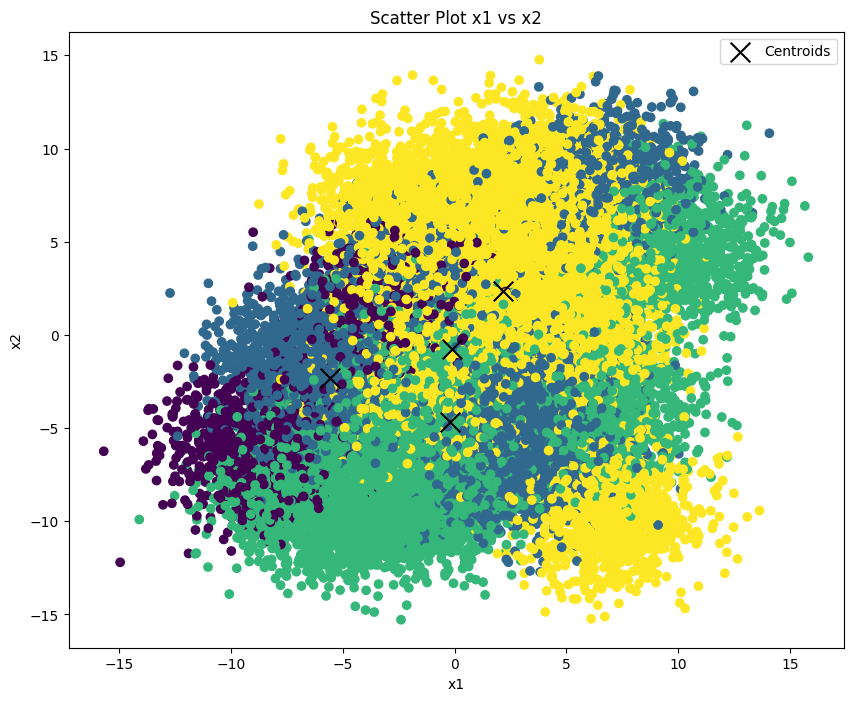

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(df['x1'], df['x2'], c=df['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot x1 vs x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

## d) Elbow plot

Compute the Elbow plot

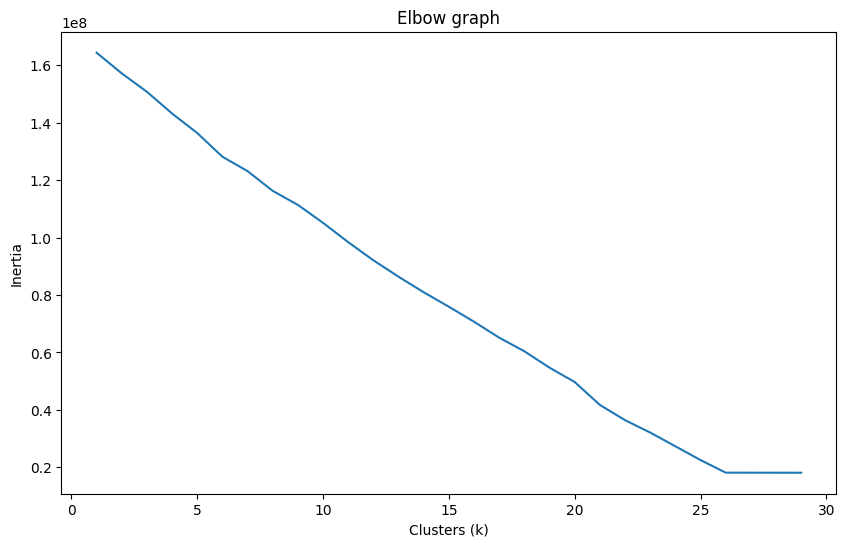

In [33]:
inertia_values = []
k_values = range(1, 30)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.iloc[:, 1:])
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values)
plt.xlabel('Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow graph')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
Based on the graph it seems the optimal number of k is 26

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
It does not agree, I thought it was going to be a lot less


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

2) Plot some of the observations (add in the title the label/digit of that obserbation)

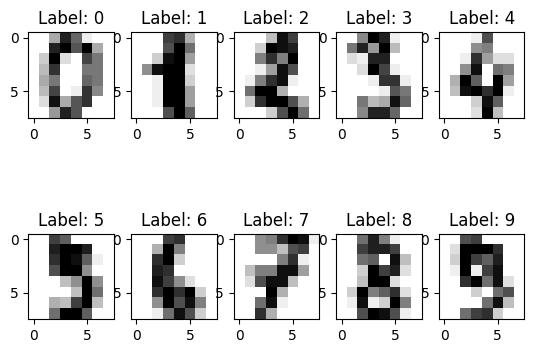

In [39]:
for index in range(10):
    plt.subplot(2, 5, index + 1)
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
    plt.title(f'Label: {digits.target[index]}')
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [36]:
#All
kmeansAll = KMeans(n_clusters=9, random_state=42)
kmeansAll.fit(digits.data)
digits['ClustersAll'] = kmeans.labels_

In [64]:
#1row
kmeans1row = KMeans(n_clusters=9, random_state=42)
kmeans1row.fit(digits.data[:, :8])
digits['Clusters1row'] = kmeans1row.labels_

In [40]:
#4row
kmeans4row = KMeans(n_clusters=9, random_state=42)
kmeans4row.fit(digits.data[:, 24:32])
digits['Clusters4row'] = kmeans4row.labels_

In [66]:
#8row
kmeans8row = KMeans(n_clusters=9, random_state=42)
kmeans8row.fit(digits.data[:, 56:])
digits['Clusters8row'] = kmeans8row.labels_

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

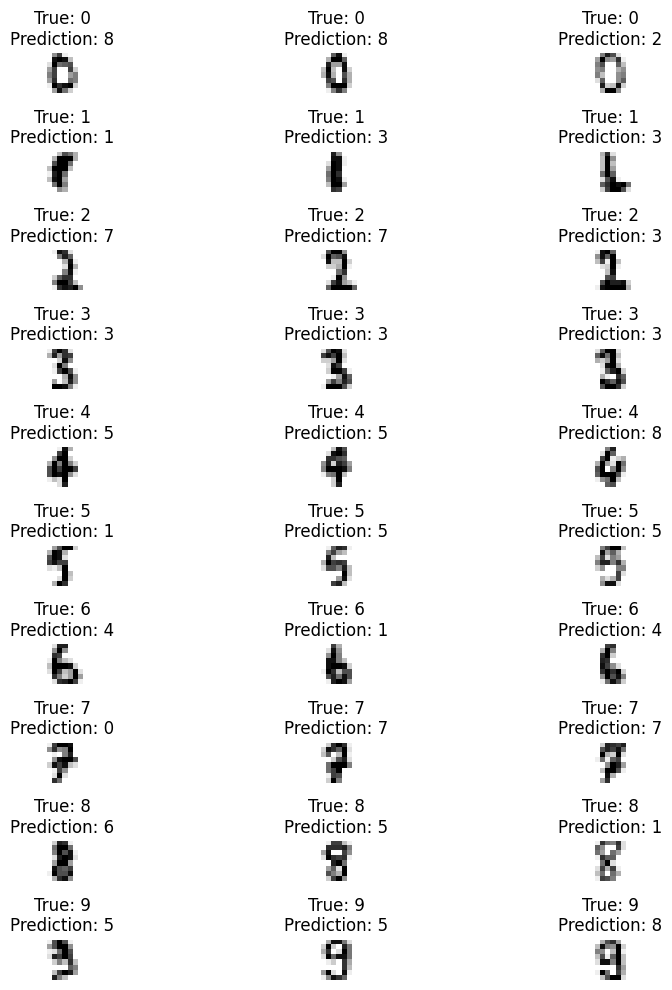

In [41]:
n_samples = 3
fig, axes = plt.subplots(10, n_samples, figsize=(10, 10))
for digit in range(10):
    #Index of image for current digit
    digit_indices = np.where(digits.target == digit)[0]
    #Random n_samples
    selected_indices = np.random.choice(digit_indices, n_samples, replace=False)
    #For each index show image and assignated cluster
    for i, index in enumerate(selected_indices):
        ax = axes[digit, i]
        ax.imshow(digits.images[index], cmap=plt.cm.gray_r)
        #Compare the number in the image with the cluster
        ax.set_title(f'True: {digits.target[index]}\nPrediction: {digits["Clusters4row"][index]}')
        ax.axis('off')
plt.tight_layout()

5) Compute the Elbow plot

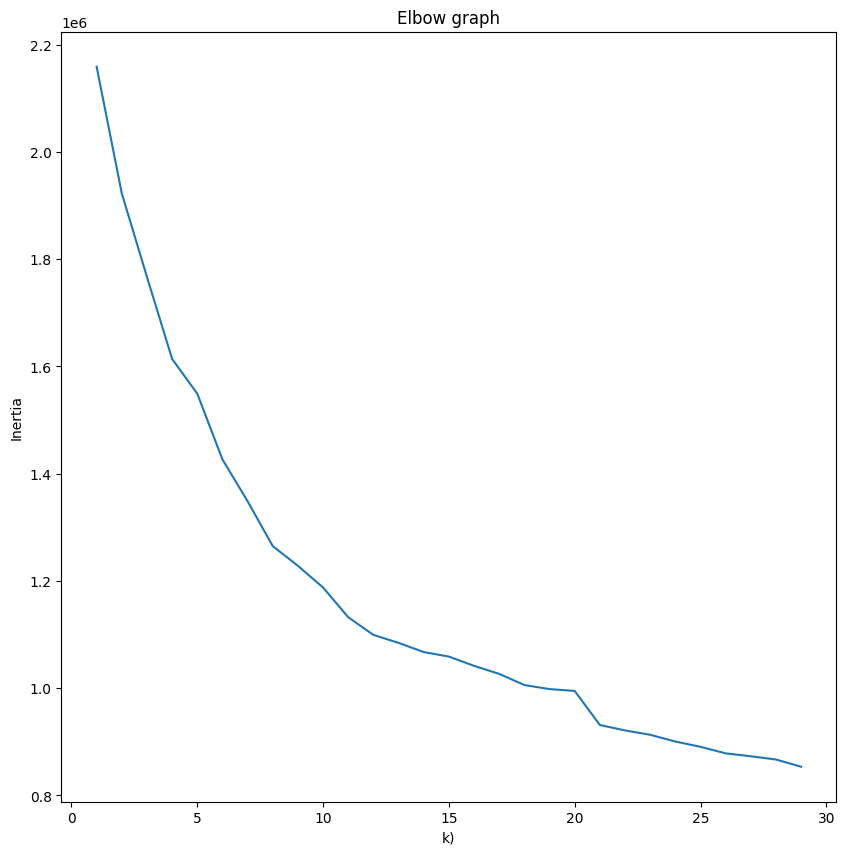

In [43]:
inertia = []
k_values = range(1, 30)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(digits.data)
    inertia.append(kmeans.inertia_)

# Plot the new Elbow plot
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertia)
plt.xlabel('k)')
plt.ylabel('Inertia')
plt.title('Elbow graph')
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):I personally found the best clusterazation for this was found using only the middle row, I personally thought that it was going to be found using all the data but with my result it seems that reduzing what the model sees maybe leaves out some unnecesary data and its more precise

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

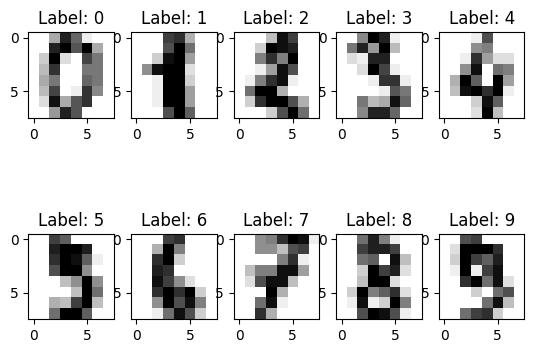

In [43]:
for index in range(10):
    plt.subplot(2, 5, index + 1)
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
    plt.title(f'Label: {digits.target[index]}')
plt.show()

3) Split the dataset in train and test

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)


In [ ]:
X_train = X_train[:, :8]
X_test = X_test[:, :8]

In [ ]:
X_train = X_train[:, 24:32]
X_test = X_test[:, 24:32]

In [ ]:
X_train = X_train[:, 56:]
X_test = X_test[:, 56:]

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

5) Make predictions (use the test set)

In [47]:
y_pred = rf_classifier.predict(X_test)

6) Compute performance metrics

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9722222222222222
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

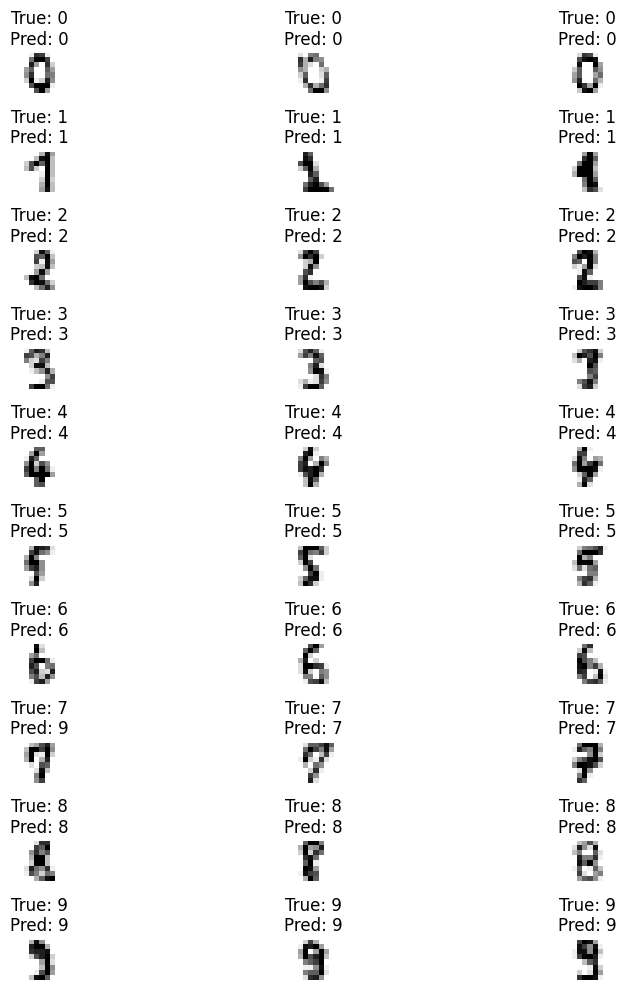

In [50]:
num_samples = 3
fig, axes = plt.subplots(10, num_samples, figsize=(10, 10))

for digit in range(10):
    digit_indices = np.where(y_test == digit)[0]
    selected_indices = np.random.choice(digit_indices, num_samples, replace=False)

    for i, index in enumerate(selected_indices):
        ax = axes[digit, i]
        ax.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r)
        ax.set_title(f'True: {y_test[index]}\nPred: {y_pred[index]}')
        ax.axis('off')

plt.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):
After using the different classifications and different from my last response I found a way better performance of the model using all the data.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Puedo observar un set de datos e intuitivamente identificar aproximadamente cuales variables son de importancia y que variables no afectan en el fenomeno

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
Fui capaz de construir modelos de multiples variables para explicar un fenomeno vastente bien y aplicandolo en diferentes datasets